# Find Clusters in Data

This notebook is used to apply clustering algorithms to the data. It applies three kinds of clustering:

- HDBSCAN
- Affinity propagation
- Spectral clustering

Author: Iris Reitsma <br />

In [1]:
"""
Importing all libraries needed.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import hdbscan
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

In [2]:
# Load in data
tbl = pd.read_csv('preprocessed_data_avg.csv')
display(tbl.head())

# Pick a waveband
tbl = tbl[tbl['Filter']=='Ks'] 

# Select only NSs
# states = pd.read_csv('FSRED Mags - total_source_list.csv')
# nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ') | (states['NS/BH']=='NS (UC)')]['Source'].to_list()
# tbl = tbl[tbl['Source'].isin(nss)]

,Unnamed: 0,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,...,log_L_NIR_errup_nodist,log_L_NIR_errlow_nodist,log_L_NIR_errup_noflux,log_L_NIR_errlow_noflux,log_L_X_errup_nodist,log_L_X_errlow_nodist,log_L_X_errup_noflux,log_L_X_errlow_noflux,log_L_NIR_upplim,log_L_X_upplim
0,0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003808,0.003808,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
1,2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.002848,0.002848,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
2,4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003019,0.003019,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
3,6,UW_Crb,Ks,1081,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.051416,0.051416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,UW_Crb,H,1086,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.038230,0.038230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove rows with empty dataa
blobs = tbl[['log_L_X', 'log_L_NIR']].dropna()

## Algorithm 1: HDBSCAN

In [4]:
# Apply clustering altorithm
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
clusterer.fit(blobs)

# Extract labels and clusters
blobs.loc[:,"label_hdb"] = clusterer.labels_
groups = blobs.groupby('label_hdb')

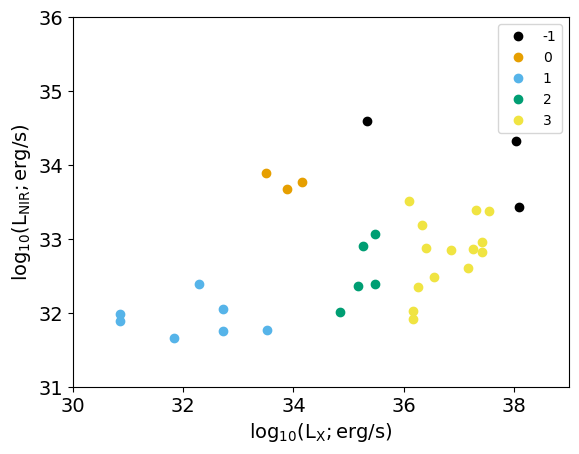

In [5]:
# PLot clusters
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
i=0
for name, group in groups:
    c=colors[i]
    i += 1
    plt.plot(group['log_L_X'], group['log_L_NIR'], marker='o', linestyle='', markersize=6, label=name, c=c)
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()

## Algorithm 2: Affinity propagation

In [6]:
# Apply clustering altorithm
af = AffinityPropagation(random_state=2).fit(blobs)

# Extract labels and clusters
blobs.loc[:,"label_af"] = af.labels_
labels = af.labels_
cluster_centers_indices = af.cluster_centers_indices_
X = blobs.to_numpy()
n_clusters_ = len(cluster_centers_indices)

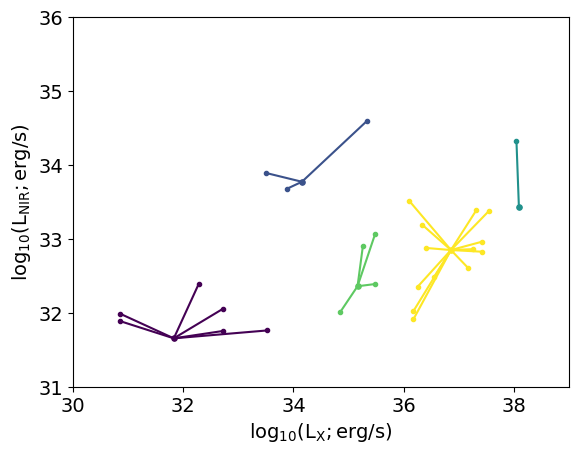

In [7]:
# PLot clusters
colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 5)))
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Algorithm 3: Spectral clustering

In [8]:
# Apply clustering altorithm
sc = SpectralClustering(n_clusters=4).fit(blobs)

# Extract labels and clusters
blobs.loc[:,"label_sc"] = sc.labels_
groups = blobs.groupby('label_sc')

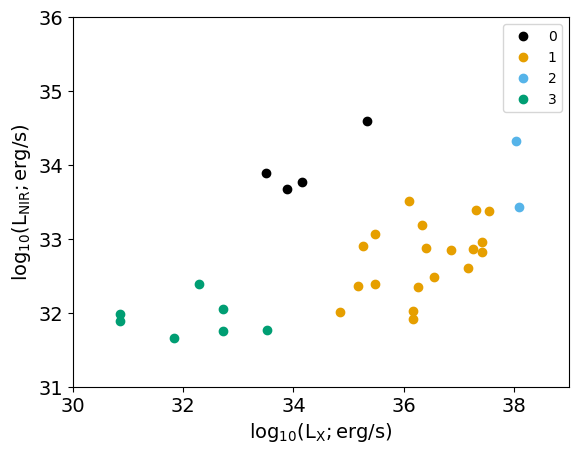

In [9]:
# Plot clusters
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
i=0
for name, group in groups:
    c=colors[i]
    i += 1
    plt.plot(group['log_L_X'], group['log_L_NIR'], marker='o', linestyle='', markersize=6, label=name, c=c)
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()